In [200]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pylab as plt
import matplotlib.dates as dates
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
dataMaster = pd.read_csv('sp_500_ts.csv')
sp_500 = dataMaster['sp_500']
print(sp_500.head(12))

0     464.547500
1     479.072510
2     493.987503
3     507.725006
4     523.650009
5     538.805008
6     553.680008
7     560.649994
8     573.727493
9     582.029983
10    594.149994
11    612.307495
Name: sp_500, dtype: float64


In [203]:
ran = pd.date_range('1995-01', '2016-1', freq = 'M')
ts = pd.Series(dataMaster['sp_500'].values, index = ran)
print(ts.head(12))
print(ts.dtypes)

1995-01-31    464.547500
1995-02-28    479.072510
1995-03-31    493.987503
1995-04-30    507.725006
1995-05-31    523.650009
1995-06-30    538.805008
1995-07-31    553.680008
1995-08-31    560.649994
1995-09-30    573.727493
1995-10-31    582.029983
1995-11-30    594.149994
1995-12-31    612.307495
Freq: M, dtype: float64
float64


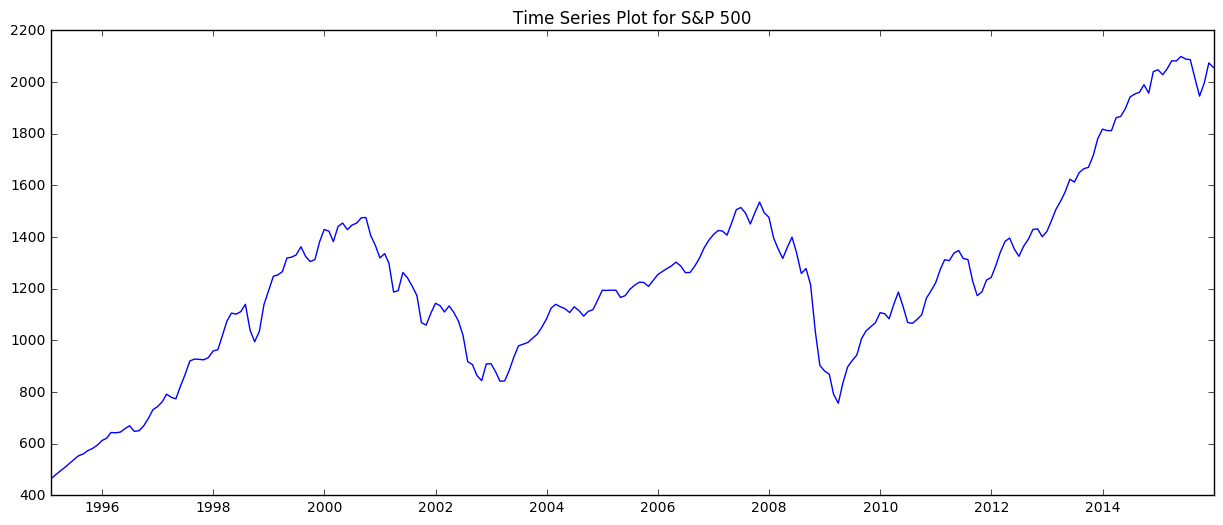

1995-01-31     464.547500
1995-02-28     479.072510
1995-03-31     493.987503
1995-04-30     507.725006
1995-05-31     523.650009
1995-06-30     538.805008
1995-07-31     553.680008
1995-08-31     560.649994
1995-09-30     573.727493
1995-10-31     582.029983
1995-11-30     594.149994
1995-12-31     612.307495
1996-01-31     621.354996
1996-02-29     643.597504
1996-03-31     642.632492
1996-04-30     645.122498
1996-05-31     658.614990
1996-06-30     669.705002
1996-07-31     648.085007
1996-08-31     650.527496
1996-09-30     668.542496
1996-10-31     697.779999
1996-11-30     731.427506
1996-12-31     744.050003
1997-01-31     762.779983
1997-02-28     792.022492
1997-03-31     779.742508
1997-04-30     774.032501
1997-05-31     823.675018
1997-06-30     868.582519
                 ...     
2012-07-31    1364.699982
2012-08-31    1391.807495
2012-09-30    1429.570038
2012-10-31    1431.825012
2012-11-30    1401.500000
2012-12-31    1422.159973
2013-01-31    1465.107452
2013-02-28  

In [204]:
plt.plot(ts)
plt.title('Time Series Plot for S&P 500')
# plt.xlim([0, 255])
plt.show()
sp500_TR = ts['1995':'2014']
print(sp500_TR)

In [205]:
# DIAGNOSING ACF
acf = plot_acf(ts, lags = 20)
plt.title("ACF Plot of SP 500")
acf.show()

# DIAGNOSING PACF
pacf = plot_pacf(ts, lags = 20)
plt.title("PACF Plot of SP 500")
pacf.show()

C:\Users\Saleban\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


1995-02-28    14.525010
1995-03-31    14.914993
1995-04-30    13.737503
1995-05-31    15.925003
1995-06-30    15.154999
1995-07-31    14.875000
1995-08-31     6.969986
1995-09-30    13.077499
1995-10-31     8.302490
1995-11-30    12.120010
1995-12-31    18.157502
1996-01-31     9.047501
Freq: M, dtype: float64
float64


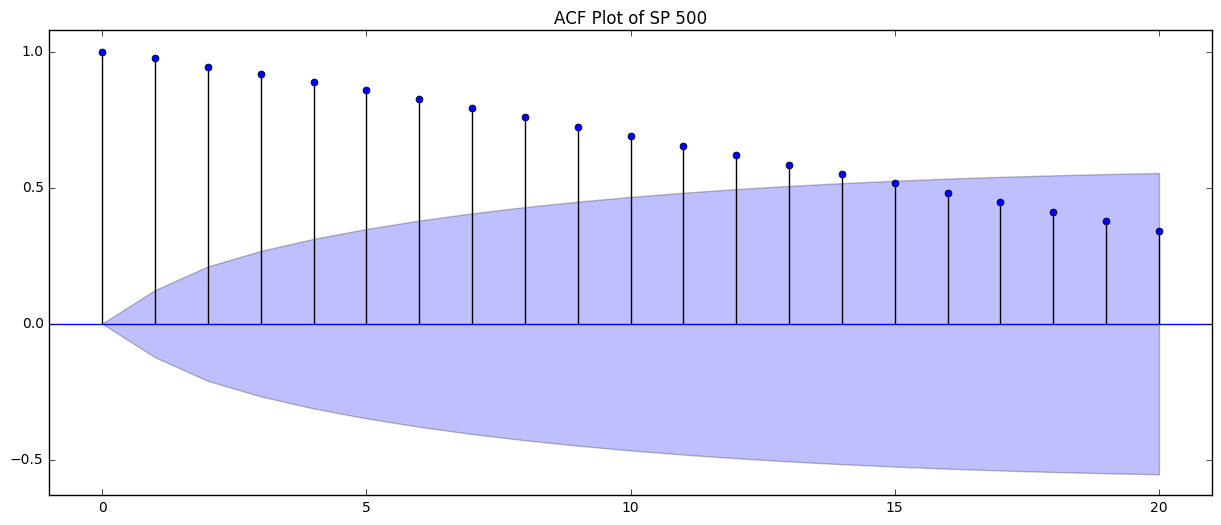

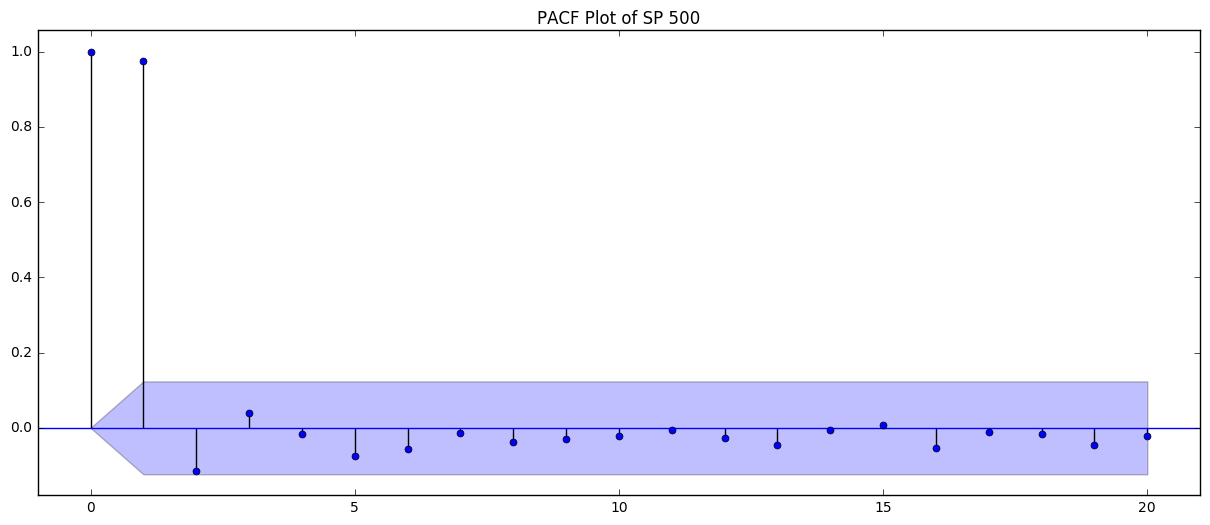

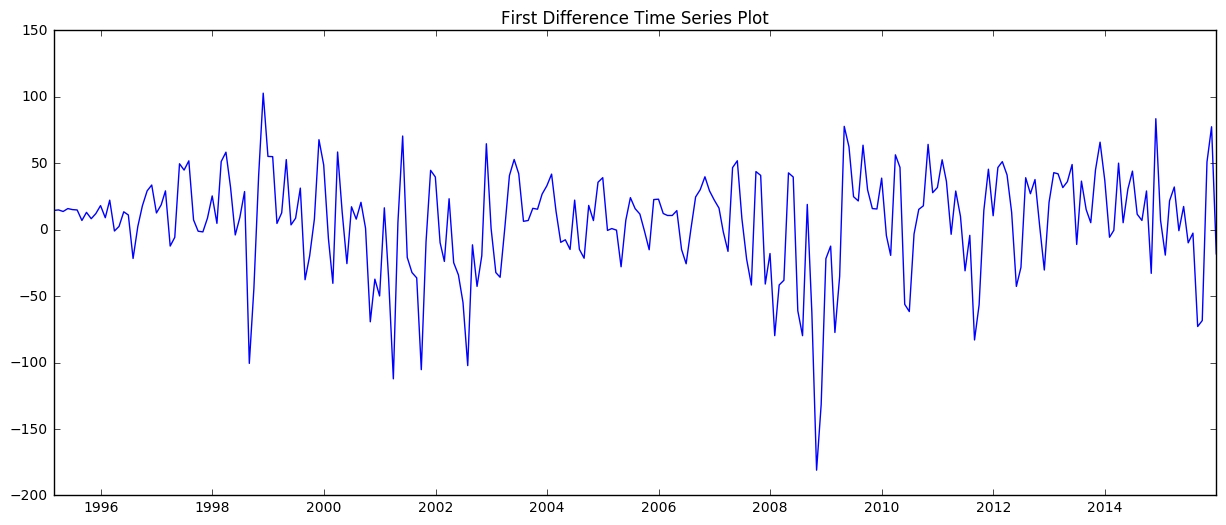

C:\Users\Saleban\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [206]:
sp500_diff = ts - ts.shift()
diff = sp500_diff.dropna()
print(diff.head(12))
print(diff.dtypes)

plt.figure()
plt.plot(diff)
plt.title('First Difference Time Series Plot')
plt.show()

acfDiff = plot_acf(diff, lags = 20)
plt.title("ACF Plot of S 500(Difference)")
acfDiff.savefig("images/timeSeriesACFDiff.png", format = 'png')
acfDiff.show()

In [207]:
# edit this shit on the actual project !
pacfDiff = plot_pacf(diff, lags = 50)
plt.title("PACF Plot of SP 500(Difference)")
pacfDiff.savefig("images/pacfDiff.png", format = 'png')
pacfDiff.show()

C:\Users\Saleban\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [254]:
mod = ARIMA(sp500_TR, order = (2, 1, 0))

results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  239
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1185.836
Method:                       css-mle   S.D. of innovations             34.541
Date:                Fri, 21 Apr 2017   AIC                           2379.672
Time:                        21:41:04   BIC                           2393.578
Sample:                    02-28-1995   HQIC                          2385.276
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.5401      3.202      2.043      0.042         0.264    12.816
ar.L1.D.y      0.4966      0.063      7.827      0.000         0.372     0.621
ar.L2.D.y     -0.1940      0.064     -3.039      0.0

In [255]:
predVals = results.predict(9, 277, typ='levels')
print(predVals)
predVals = predVals.drop(predVals.index[0])
print(predVals)
sp500_for = pd.concat([ts, predVals], axis = 1, keys=['original', 'predicted'])
print(sp500_for['2014':'2015'])

1995-10-31     583.430572
1995-11-30     588.177270
1995-12-31     603.119150
1996-01-31     623.534364
1996-02-29     626.886952
1996-03-31     657.448863
1996-04-30     642.400054
1996-05-31     651.106998
1996-06-30     669.393066
1996-07-31     677.156045
1996-08-31     639.758655
1996-09-30     660.494544
1996-10-31     681.575606
1996-11-30     713.365689
1996-12-31     747.026483
1997-01-31     748.352887
1997-02-28     774.193678
1997-03-31     807.471993
1997-04-30     772.533513
1997-05-31     778.139580
1997-06-30     853.995167
1997-07-31     885.815405
1997-08-31     942.027561
1997-09-30     925.990760
1997-10-31     929.276792
1997-11-30     929.040163
1997-12-31     943.003445
1998-01-31     974.759681
1998-02-28     966.053595
1998-03-31    1044.516363
                 ...     
2015-09-30    2085.357425
2015-10-31    2091.900576
2015-11-30    2098.445306
2015-12-31    2104.987083
2016-01-31    2111.527086
2016-02-29    2118.066783
2016-03-31    2124.606670
2016-04-30  

C:\Users\Saleban\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


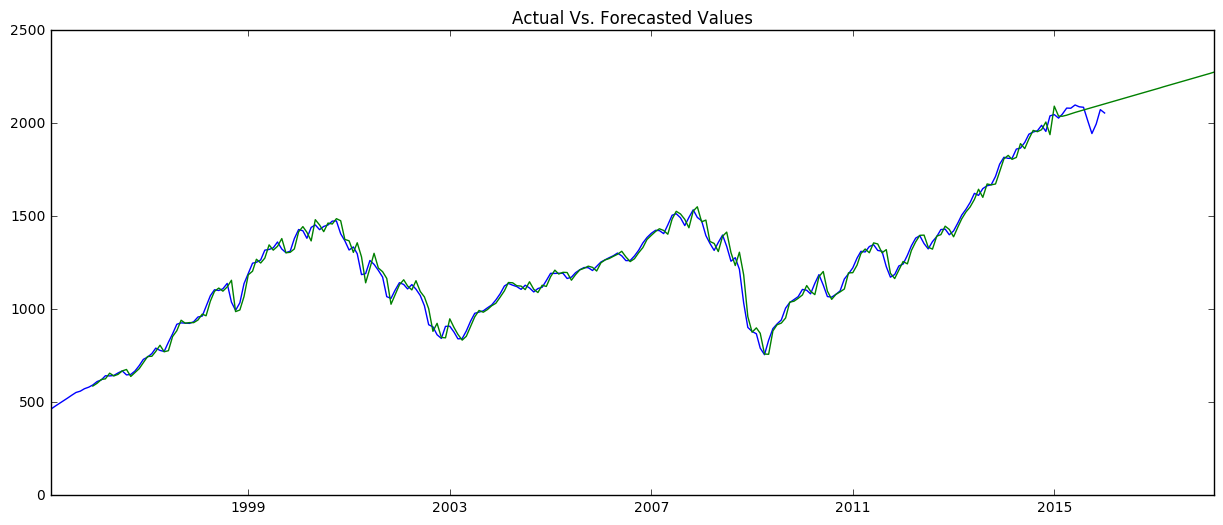

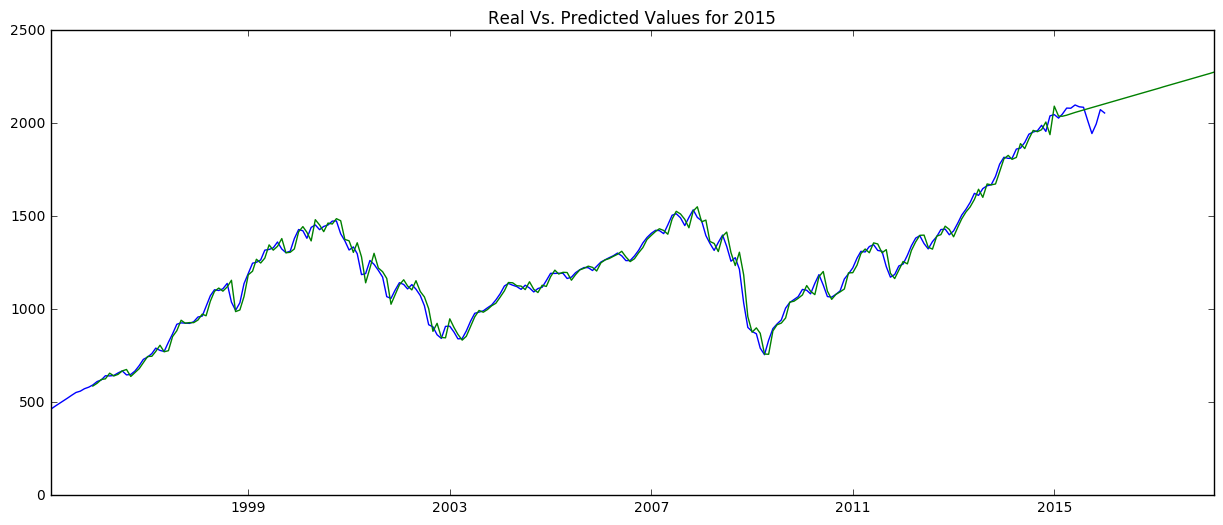

In [256]:
plt.figure()
plt.plot(sp500_for)
plt.title("Actual Vs. Forecasted Values")
plt.savefig("images/sp500_for.png", format = 'png')
plt.show()

plt.figure()
plt.plot(sp500_for)
plt.title('Real Vs. Predicted Values for 2015')
plt.savefig("images/sp500_for2.png", format = 'png')
plt.show()